In [1]:
print("Hello")

Hello


## Load libraries

In [23]:

from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.optimizers import Adam
import matplotlib.pyplot as plt


## load the data

In [24]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data() 

## preprocessing

In [25]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


## build arcitecture

In [26]:
model = Sequential()
model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

c:\Users\Kasarla Vishwaja\Documents\Deep_learning\Deep_Learning\Euro\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## compile

In [27]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

## train

In [28]:
result = model.fit(X_train, y_train, epochs=32, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/32
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.1703 - loss: 9.2959 - val_accuracy: 0.3110 - val_loss: 1.8777
Epoch 2/32
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3556 - loss: 1.7627 - val_accuracy: 0.3675 - val_loss: 1.7826
Epoch 3/32
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4483 - loss: 1.5202 - val_accuracy: 0.4467 - val_loss: 1.5535
Epoch 4/32
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5096 - loss: 1.3643 - val_accuracy: 0.4675 - val_loss: 1.5405
Epoch 5/32
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5667 - loss: 1.2265 - val_accuracy: 0.4933 - val_loss: 1.5411
Epoch 6/32
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6042 - loss: 1.1143 - val_accuracy: 0.5024 - val_loss: 1.4887
Epoch 7/32
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6327 - loss: 1.0232 - val_accuracy: 0.5062 - val_loss: 1.4908
Epoch 8/32
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6675 - loss: 0.9483 - val_accuracy: 0.

## evaluate

In [29]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test_Accuracy: {accuracy}, Test_Loss: {loss}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4769 - loss: 4.0505
Test_Accuracy: 0.48100000619888306, Test_Loss: 3.984445333480835


## visualization

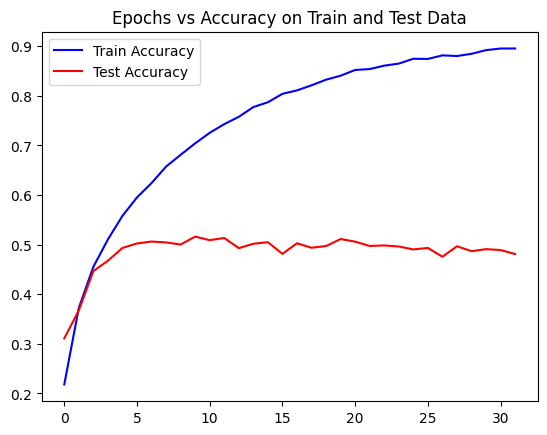

In [30]:
plt.plot(result.history['accuracy'], label='Train Accuracy',color='blue')
plt.plot(result.history['val_accuracy'], label='Test Accuracy',color='red')
plt.legend()
plt.title("Epochs vs Accuracy on Train and Test Data")
plt.show()

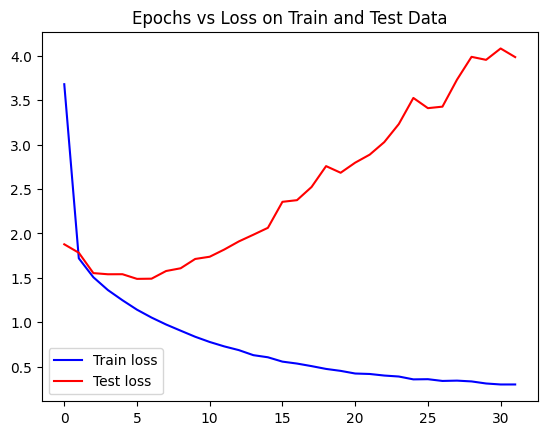

In [31]:
plt.plot(result.history['loss'], label='Train loss',color='blue')
plt.plot(result.history['val_loss'], label='Test loss',color='red')
plt.legend()
plt.title("Epochs vs Loss on Train and Test Data")
plt.show()